# **Wprowadzenie do analizy danych przy pomocy pakietu Pandas**

W tym zadaniu spróbujesz wykorzystać pakiet Pythona o nazwie Pandas do odczytu i analizy prostego zbioru danych.

Materiały pomocnicze możesz znaleźć np. na stronie: https://intertechacademy.pl/2020/08/machine-learning-w-pythonie-szybki-start/

**Uwaga! Niektóre komórki z kodem zawierają przykładowe wyniki jakie powinno udać Ci się uzyskać. Wyniki te zostaną utracone gdy uruchomisz kod z komórki.**

## **Import modułów Pythona**
Oprócz modułów numpy i pyplot, z których korzystaliśmy w poprzednim ćwiczeniu tym razem poznasz dwa nowe moduły. Pierwszy z nich to właśnie pandas, który ułatwia pracę na zbiorach danych w postaci tabelarycznej, a drugi to sklearn.datasets z pakietu Scikit-Learn. Moduł ten zawiera kilka wbudowanych zbiorów danych, z których będziemy korzystać.

In [77]:
import pandas as pd
import sklearn.datasets

import numpy as np
import matplotlib.pyplot as plt

## **Wczytanie danych**
Za pomocą modułu sklearn.datasets odczytaj zbiór danych California Housing. Następnie przetwórz to obiektu klasy DataFrame z pakietu Pandas. Służy do tego poniższy kod:


In [6]:
dataset = sklearn.datasets.fetch_california_housing(as_frame=True)
df = dataset.data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## **Zadanie 1**
Zbiór California Housing zawiera dane o nieruchomościach w różnych lokalizacjach w Kalifornii. Napisz program, który na podstawie tych danych obliczy i wyświetli wartość średnią oraz odchylenie standardowe mediany dochodów (kolumna MedInc) w każdej z tych lokalizacji.

In [10]:
med_income = df['MedInc']
print(f'Średnia wartości mediany dochodów={med_income.mean()}')
print(f'Odchylenie standardowe mediany dochodów={med_income.std()}')

Średnia wartości mediany dochodów=3.8706710029069766
Odchylenie standardowe mediany dochodów=1.8998217179452688


## **Zadanie 2**
Dodaj do obiektu df kolumnę z cenami mieszkań.

In [11]:
df['Price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **Zadanie 3**
Narysuj mapę, która za pomocą kolorów pokaże ceny mieszkań w konkretnych lokalizacjach. Na osi poziomej umieść długość geograficzną (Longitude), a na pionowej szerokość geograficzną (Latitude).

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

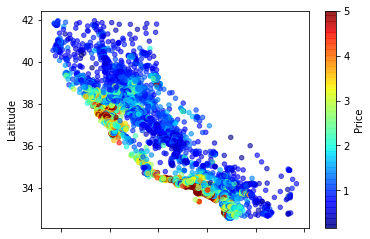

In [75]:
df.plot(kind='scatter', x='Longitude', y='Latitude', colorbar=True, c='Price', cmap=plt.get_cmap('jet'), alpha=0.6)

## **Zadanie 4**
Oblicz macierz korelacji pomiędzy wszystkimi kolumnami z tabeli df wyłączywszy kolumny Latitude i Longitude. Następnie wybierz dwie najsilniej skorelowane kolumny (wartość bezwzględna ze współczynnika korelacji powinna być jak najbliższa jedynce) i wygeneruj wykres punktowy, w którym wartości z jednej kolumny znajdą się na osi X, a z drugiej na osi Y. 

**Uwaga! Przykładowy wynik pokazuje niewłaściwe wybrane kolumny. Samodzielnie wybierz najsilniej skorelowane zmienne.**

macierz korelacji:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup     Price
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766  0.688075
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191  0.105623
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852  0.151948
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181 -0.046701
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863 -0.024650
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000 -0.023737
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737  1.000000
Max correlation = 0.8476213257130424


<AxesSubplot:xlabel='AveRooms', ylabel='AveBedrms'>

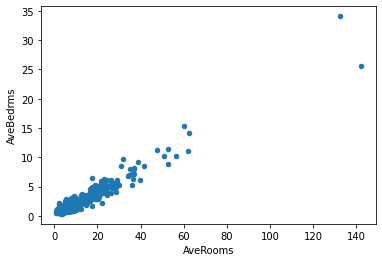

In [76]:
main_features = df.drop(columns=['Latitude', 'Longitude'])
correlation = main_features.corr()
print('macierz korelacji:\n', correlation.to_string())

corr_array = correlation.to_numpy()
np.fill_diagonal(corr_array, 0.0)
f1, f2 = np.unravel_index(np.argmax(corr_array, axis=None), corr_array.shape)
print(f'Max correlation = {corr_array.max()}')
df.plot(kind='scatter', x=correlation.columns[f1], y=correlation.columns[f2])

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

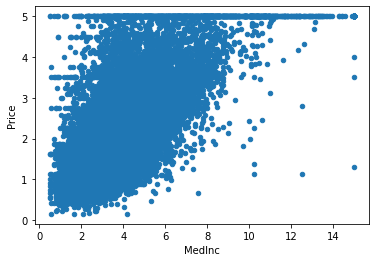

In [65]:
df.plot(kind='scatter', x='MedInc', y='Price')